# Model Builiding And Evaluation

In [1]:
%load_ext watermark
%watermark -v -p numpy,pandas,polars,mlxtend,omegaconf --conda

Python implementation: CPython
Python version       : 3.10.8
IPython version      : 8.26.0

numpy    : 1.26.0
pandas   : 2.2.2
polars   : 1.4.1
mlxtend  : 0.23.1
omegaconf: not installed

conda environment: n/a



In [2]:
# Built-in library
from pathlib import Path
from pathlib import Path
import re
import json
from typing import Any, Optional, Union
import logging
import warnings

# Standard imports
import numpy as np
import numpy.typing as npt
from pprint import pprint
import pandas as pd
import polars as pl
from rich.console import Console
from rich.theme import Theme

custom_theme = Theme(
    {
        "info": "#76FF7B",
        "warning": "#FBDDFE",
        "error": "#FF0000",
    }
)
console = Console(theme=custom_theme)

# Visualization
import matplotlib.pyplot as plt

# NumPy settings
np.set_printoptions(precision=4)

# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Polars settings
pl.Config.set_fmt_str_lengths(1_000)
pl.Config.set_tbl_cols(n=1_000)
pl.Config.set_tbl_rows(n=200)

warnings.filterwarnings("ignore")


# auto reload imports# Built-in library
from pathlib import Path
import re
import json
from typing import Any, Optional, Union
import logging
import warnings

# Standard imports
import numpy as np
import numpy.typing as npt
from pprint import pprint
import pandas as pd
import polars as pl
from rich.console import Console
from rich.theme import Theme

custom_theme = Theme(
    {
        "info": "#76FF7B",
        "warning": "#FBDDFE",
        "error": "#FF0000",
    }
)
console = Console(theme=custom_theme)

# Visualization
import matplotlib.pyplot as plt

# NumPy settings
np.set_printoptions(precision=4)

# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Polars settings
pl.Config.set_fmt_str_lengths(1_000)
pl.Config.set_tbl_cols(n=1_000)
pl.Config.set_tbl_rows(500)

warnings.filterwarnings("ignore")


# Black code formatter (Optional)
%load_ext lab_black

# auto reload imports
%load_ext autoreload
%autoreload 2

### Load Data

In [3]:
pl.Config.set_fmt_str_lengths(20)
pl.set_random_seed(seed=123)


fp: str = "../data/articles_final_df.parquet"
articles_df: pl.DataFrame = pl.read_parquet(fp)
print(f"{articles_df.shape = }")
articles_df.head(2)

articles_df.shape = (9335, 10)


articleID,articleWordCount,documentType,pubDate,source,typeOfMaterial,metadata,metadata_1,metadata_2,is_high_engagement
str,i64,str,date,str,str,str,str,str,u8
"""58927e0495d0e0392607…",1129,"""article""",2017-02-02,"""The New York Times""","""news""","""ken belson n f l vs …","""ken belson n f l vs …","""ken belson n f l vs …",0
"""5893033d95d0e0392607…",3082,"""article""",2017-02-02,"""The New York Times""","""news""","""unknown voice vice v…","""unknown voice vice v…","""unknown voice vice v…",1


In [4]:
from sklearn.model_selection import train_test_split


seed: int = 123
test_size: float = 0.15
target: str = "is_high_engagement"

# X: pl.DataFrame = articles_df.drop([target])
X: pl.DataFrame = articles_df.select(
    [
        "articleID",
        "articleWordCount",
        "metadata_2",
        "pubDate",
    ]
)
y: pl.Series = articles_df[target]

X_train: pl.DataFrame
y_train: pl.Series
X_test: pl.DataFrame
y_test: pl.Series
X_val: pl.DataFrame
y_val: pl.Series

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=test_size, random_state=seed, stratify=y_train
)

print(f"{X_train.shape = }, {X_val.shape = }, {X_test.shape = }")

X_train.shape = (6743, 4), X_val.shape = (1191, 4), X_test.shape = (1401, 4)


In [5]:
y.value_counts(sort=True), y_train.value_counts(sort=True)

(shape: (2, 2)
 ┌────────────────────┬───────┐
 │ is_high_engagement ┆ count │
 │ ---                ┆ ---   │
 │ u8                 ┆ u32   │
 ╞════════════════════╪═══════╡
 │ 0                  ┆ 5587  │
 │ 1                  ┆ 3748  │
 └────────────────────┴───────┘,
 shape: (2, 2)
 ┌────────────────────┬───────┐
 │ is_high_engagement ┆ count │
 │ ---                ┆ ---   │
 │ u8                 ┆ u32   │
 ╞════════════════════╪═══════╡
 │ 0                  ┆ 4036  │
 │ 1                  ┆ 2707  │
 └────────────────────┴───────┘)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from opinion_mine.ml.training import (
    calculate_class_weights,
    train_model_with_cross_validation,
)
from spacy.lang.en.stop_words import STOP_WORDS


stopwords: list[str] = list(STOP_WORDS)
n_saples_0: int = np.bincount(y_train.to_numpy())[0]
n_saples_1: int = np.bincount(y_train.to_numpy())[1]
total_samples: int = y_train.shape[0]
n_classes: int = len(np.unique(y_train))

weight_0: float = calculate_class_weights(
    n_samples=n_saples_0, total_samples=total_samples, n_classes=n_classes
)
weight_1: float = calculate_class_weights(
    n_samples=n_saples_1, total_samples=total_samples, n_classes=n_classes
)

class_weight: dict[str, float] = {0: weight_0, 1: weight_1}
print(f"{class_weight = }")

class_weight = {0: 0.8354, 1: 1.2455}


In [7]:
# One-hot encode
ohe_columns: list[str] = ["year"]

# Others
text_columns: list[str] = ["metadata_2"]
numeric_columns: list[str] = ["articleWordCount"]
date_columns: list[str] = ["pubDate"]
cyclical_columns: list[str] = ["day", "day_of_week", "week_of_year", "month"]

# Columns to drop
drop_columns: list[str] = [
    "pubDate",
    "day",
    "day_of_week",
    "month",
    "week_of_year",
    "day_cos",
    "day_sin",
    "quarter",
]

In [8]:
from sklearn.pipeline import Pipeline

from opinion_mine.ml.transformers import (
    CustomOneHotEncoder,
    CyclicTemporalFeatures,
    DropFeatures,
    ExtractTemporalFeatures,
    NumericalScaler,
    SVDTransformer,
    TFIDFTransformer,
)
from opinion_mine.ml.evaluation import *


max_df: float = 0.95
min_df: float = 2
n_components: int = 300


preprocessor_pipe: Pipeline = Pipeline(
    steps=[
        (
            "temporal_features",
            ExtractTemporalFeatures(
                date_column="pubDate", date_format="%Y-%m-%d %H:%M:%S"
            ),
        ),
        ("cyclical_features", CyclicTemporalFeatures()),
        ("ohe", CustomOneHotEncoder(features=ohe_columns)),
        (
            "tfidf_vectorizer",
            TFIDFTransformer(
                feature=text_columns[0],
                stop_words="english",
                max_df=max_df,
                min_df=min_df,
            ),
        ),
        (
            "svd",
            SVDTransformer(
                include_pattern="tfidf__",
                n_components=n_components,
                random_state=seed,
            ),
        ),
        ("drop_features", DropFeatures(features=drop_columns)),
        (
            "scaler",
            NumericalScaler(scaler_type="min_max", exclude_features=["articleID"]),
        ),
        ("drop_features_2", DropFeatures(features=["articleID"])),
    ]
)

preprocessor_pipe

Pipeline(steps=[('temporal_features',
                 ExtractTemporalFeatures(date_column='pubDate')),
                ('cyclical_features', CyclicTemporalFeatures()),
                ('ohe', CustomOneHotEncoder(features=['year'])),
                ('tfidf_vectorizer',
                 TFIDFTransformer(feature='metadata_2', max_df=0.95, min_df=2)),
                ('svd',
                 SVDTransformer(include_pattern='tfidf__', n_components=300,
                                random_state=123)),
                ('drop_features',
                 DropFeatures(features=['pubDate', 'day', 'day_of_week',
                                        'month', 'week_of_year', 'day_cos',
                                        'day_sin', 'quarter'])),
                ('scaler',
                 NumericalScaler(exclude_features=['articleID'],
                                 scaler_type='min_max')),
                ('drop_features_2', DropFeatures(features=['articleID']))])

In [9]:
X_train_tr: pl.DataFrame = preprocessor_pipe.fit_transform(X_train)
X_test_tr: pl.DataFrame = preprocessor_pipe.transform(X_test)
X_val_tr: pl.DataFrame = preprocessor_pipe.transform(X_val)


print(f"{X_train_tr.shape = }, {X_test_tr.shape = }, {X_val_tr.shape = }")

X_train_tr.shape = (6743, 309), X_test_tr.shape = (1401, 309), X_val_tr.shape = (1191, 309)


In [10]:
X_train_tr.head(2)

articleWordCount,day_of_week_cos,day_of_week_sin,month_cos,month_sin,truncatedsvd0,truncatedsvd1,truncatedsvd10,truncatedsvd100,truncatedsvd101,truncatedsvd102,truncatedsvd103,truncatedsvd104,truncatedsvd105,truncatedsvd106,truncatedsvd107,truncatedsvd108,truncatedsvd109,truncatedsvd11,truncatedsvd110,truncatedsvd111,truncatedsvd112,truncatedsvd113,truncatedsvd114,truncatedsvd115,truncatedsvd116,truncatedsvd117,truncatedsvd118,truncatedsvd119,truncatedsvd12,truncatedsvd120,truncatedsvd121,truncatedsvd122,truncatedsvd123,truncatedsvd124,truncatedsvd125,truncatedsvd126,truncatedsvd127,truncatedsvd128,truncatedsvd129,truncatedsvd13,truncatedsvd130,truncatedsvd131,truncatedsvd132,truncatedsvd133,truncatedsvd134,truncatedsvd135,truncatedsvd136,truncatedsvd137,truncatedsvd138,truncatedsvd139,truncatedsvd14,truncatedsvd140,truncatedsvd141,truncatedsvd142,truncatedsvd143,truncatedsvd144,truncatedsvd145,truncatedsvd146,truncatedsvd147,truncatedsvd148,truncatedsvd149,truncatedsvd15,truncatedsvd150,truncatedsvd151,truncatedsvd152,truncatedsvd153,truncatedsvd154,truncatedsvd155,truncatedsvd156,truncatedsvd157,truncatedsvd158,truncatedsvd159,truncatedsvd16,truncatedsvd160,truncatedsvd161,truncatedsvd162,truncatedsvd163,truncatedsvd164,truncatedsvd165,truncatedsvd166,truncatedsvd167,truncatedsvd168,truncatedsvd169,truncatedsvd17,truncatedsvd170,truncatedsvd171,truncatedsvd172,truncatedsvd173,truncatedsvd174,truncatedsvd175,truncatedsvd176,truncatedsvd177,truncatedsvd178,truncatedsvd179,truncatedsvd18,truncatedsvd180,truncatedsvd181,truncatedsvd182,truncatedsvd183,truncatedsvd184,truncatedsvd185,truncatedsvd186,truncatedsvd187,truncatedsvd188,truncatedsvd189,truncatedsvd19,truncatedsvd190,truncatedsvd191,truncatedsvd192,truncatedsvd193,truncatedsvd194,truncatedsvd195,truncatedsvd196,truncatedsvd197,truncatedsvd198,truncatedsvd199,truncatedsvd2,truncatedsvd20,truncatedsvd200,truncatedsvd201,truncatedsvd202,truncatedsvd203,truncatedsvd204,truncatedsvd205,truncatedsvd206,truncatedsvd207,truncatedsvd208,truncatedsvd209,truncatedsvd21,truncatedsvd210,truncatedsvd211,truncatedsvd212,truncatedsvd213,truncatedsvd214,truncatedsvd215,truncatedsvd216,truncatedsvd217,truncatedsvd218,truncatedsvd219,truncatedsvd22,truncatedsvd220,truncatedsvd221,truncatedsvd222,truncatedsvd223,truncatedsvd224,truncatedsvd225,truncatedsvd226,truncatedsvd227,truncatedsvd228,truncatedsvd229,truncatedsvd23,truncatedsvd230,truncatedsvd231,truncatedsvd232,truncatedsvd233,truncatedsvd234,truncatedsvd235,truncatedsvd236,truncatedsvd237,truncatedsvd238,truncatedsvd239,truncatedsvd24,truncatedsvd240,truncatedsvd241,truncatedsvd242,truncatedsvd243,truncatedsvd244,truncatedsvd245,truncatedsvd246,truncatedsvd247,truncatedsvd248,truncatedsvd249,truncatedsvd25,truncatedsvd250,truncatedsvd251,truncatedsvd252,truncatedsvd253,truncatedsvd254,truncatedsvd255,truncatedsvd256,truncatedsvd257,truncatedsvd258,truncatedsvd259,truncatedsvd26,truncatedsvd260,truncatedsvd261,truncatedsvd262,truncatedsvd263,truncatedsvd264,truncatedsvd265,truncatedsvd266,truncatedsvd267,truncatedsvd268,truncatedsvd269,truncatedsvd27,truncatedsvd270,truncatedsvd271,truncatedsvd272,truncatedsvd273,truncatedsvd274,truncatedsvd275,truncatedsvd276,truncatedsvd277,truncatedsvd278,truncatedsvd279,truncatedsvd28,truncatedsvd280,truncatedsvd281,truncatedsvd282,truncatedsvd283,truncatedsvd284,truncatedsvd285,truncatedsvd286,truncatedsvd287,truncatedsvd288,truncatedsvd289,truncatedsvd29,truncatedsvd290,truncatedsvd291,truncatedsvd292,truncatedsvd293,truncatedsvd294,truncatedsvd295,truncatedsvd296,truncatedsvd297,truncatedsvd298,truncatedsvd299,truncatedsvd3,truncatedsvd30,truncatedsvd31,truncatedsvd32,truncatedsvd33,truncatedsvd34,truncatedsvd35,truncatedsvd36,truncatedsvd37,truncatedsvd38,truncatedsvd39,truncatedsvd4,truncatedsvd40,truncatedsvd41,truncatedsvd42,truncatedsvd43,truncatedsvd44,truncatedsvd45,truncatedsvd46,truncatedsvd47,truncatedsvd48,truncatedsvd49,truncatedsvd5,truncatedsvd50,truncatedsvd51,truncatedsvd52,tr

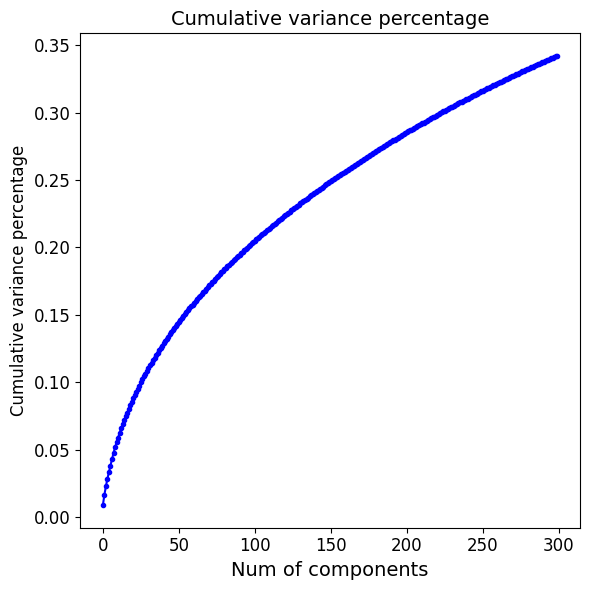

In [11]:
# import TruncatedSVD
from sklearn.decomposition import TruncatedSVD


svd: TruncatedSVD = preprocessor_pipe.named_steps["svd"]

plot_cumulative_variance(estimator=svd)

In [12]:
log_model: LogisticRegression = LogisticRegression(
    class_weight=class_weight,
    random_state=seed,
)
rf_model: RandomForestClassifier = RandomForestClassifier(
    n_estimators=50,
    class_weight=class_weight,
    random_state=seed,
    max_depth=10,
)

In [13]:
log_model, scores, mean_accuracy, std_accuracy = train_model_with_cross_validation(
    X=X_train_tr, y=y_train, estimator=log_model, n_splits=5
)

Fold:  1 | Class dist.: [3228 2166] | Acc: 0.759
Fold:  2 | Class dist.: [3229 2165] | Acc: 0.775
Fold:  3 | Class dist.: [3229 2165] | Acc: 0.758
Fold:  4 | Class dist.: [3229 2166] | Acc: 0.751
Fold:  5 | Class dist.: [3229 2166] | Acc: 0.761

CV accuracy: 0.761 +/- 0.008

Time taken: 0.954 seconds


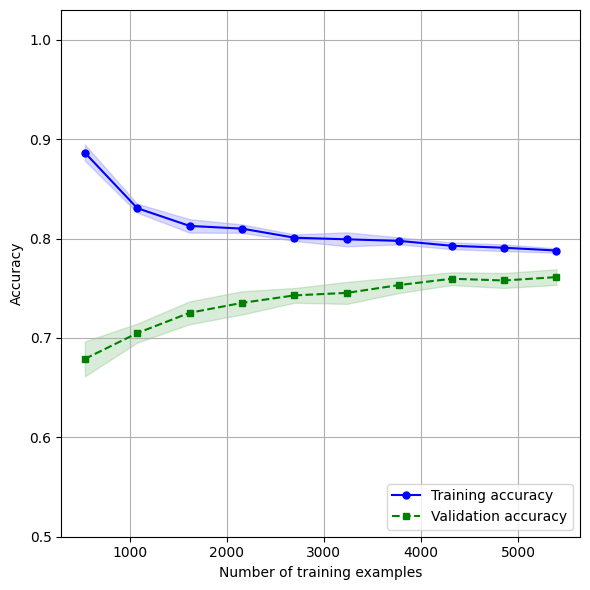

In [14]:
plot_learning_curve(
    estimator=log_model,
    X=X_train_tr,
    y=y_train,
    train_sizes=np.linspace(0.1, 1, 10),
    cv=5,
)

In [15]:
y_train_pred: np.ndarray = log_model.predict(X_train_tr)
y_train_proba: np.ndarray = log_model.predict_proba(X_train_tr)[:, 1]

y_test_pred: np.ndarray = log_model.predict(X_test_tr)
y_test_proba: np.ndarray = log_model.predict_proba(X_test_tr)[:, 1]

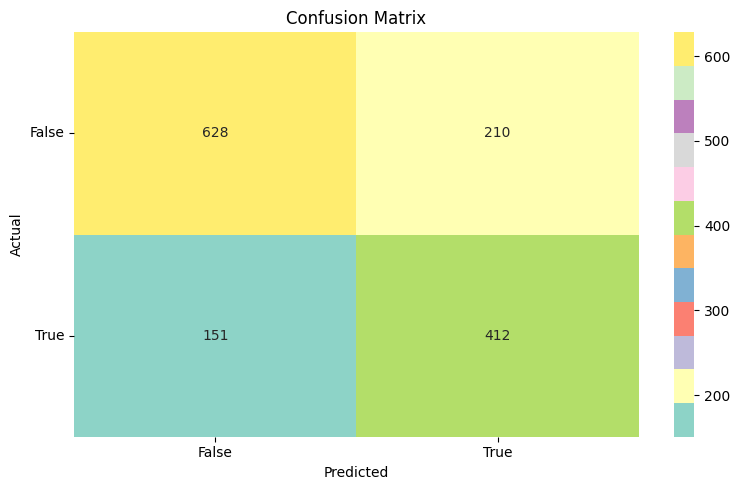

In [16]:
plot_confusion_matrix(y_true=y_test, y_pred=y_test_pred, labels=["False", "True"])

In [17]:
from sklearn import metrics

# === ROC AUC ===
# Shape: (n_samples, n_classes)[:, 1] -> (n_samples, )


train_auc_score: float = metrics.roc_auc_score(y_true=y_train, y_score=y_train_proba)
test_auc_score: float = metrics.roc_auc_score(y_true=y_test, y_score=y_test_proba)

print(f"Train AUC Score: {train_auc_score:.4f}\nTest AUC Score: {test_auc_score:.4f}")

Train AUC Score: 0.8602
Test AUC Score: 0.8271


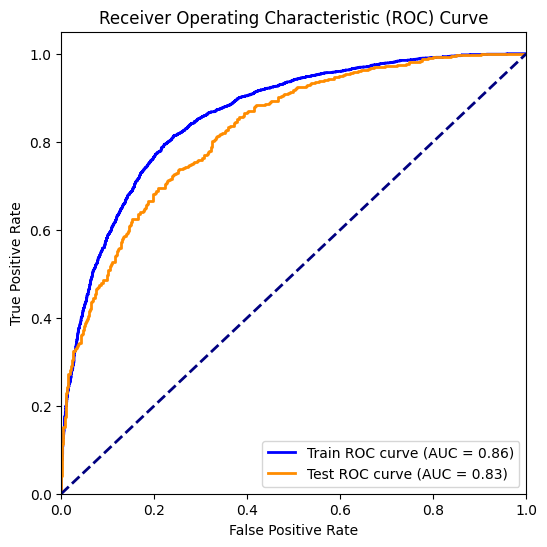

In [18]:
plot_roc_curves(
    y_train,
    y_train_proba,
    y_test,
    y_test_proba,
)

### Random Forest

In [19]:
rf_model, scores, mean_accuracy, std_accuracy = train_model_with_cross_validation(
    X=X_train_tr, y=y_train, estimator=rf_model, n_splits=5
)

Fold:  1 | Class dist.: [3228 2166] | Acc: 0.737
Fold:  2 | Class dist.: [3229 2165] | Acc: 0.761
Fold:  3 | Class dist.: [3229 2165] | Acc: 0.745
Fold:  4 | Class dist.: [3229 2166] | Acc: 0.740
Fold:  5 | Class dist.: [3229 2166] | Acc: 0.742

CV accuracy: 0.745 +/- 0.009

Time taken: 22.896 seconds


In [20]:
# plot_learning_curve(
#     estimator=rf_model,
#     X=X_train_tr,
#     y=y_train,
#     train_sizes=np.linspace(0.1, 1, 10),
#     cv=5,
# )

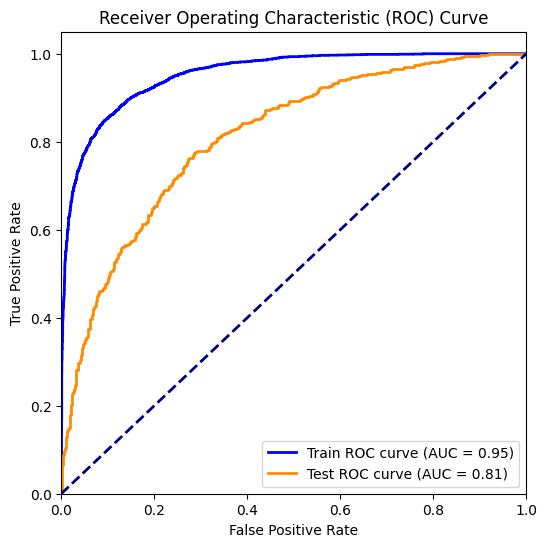

In [21]:
y_train_pred: np.ndarray = rf_model.predict(X_train_tr)
y_train_proba: np.ndarray = rf_model.predict_proba(X_train_tr)[:, 1]

y_test_pred: np.ndarray = rf_model.predict(X_test_tr)
y_test_proba: np.ndarray = rf_model.predict_proba(X_test_tr)[:, 1]


plot_roc_curves(
    y_train,
    y_train_proba,
    y_test,
    y_test_proba,
)

In [22]:
# === ROC AUC ===
# Shape: (n_samples, n_classes)[:, 1] -> (n_samples, )
train_auc_score: float = metrics.roc_auc_score(y_true=y_train, y_score=y_train_proba)
test_auc_score: float = metrics.roc_auc_score(y_true=y_test, y_score=y_test_proba)

print(f"Train AUC Score: {train_auc_score:.4f}\nTest AUC Score: {test_auc_score:.4f}")

Train AUC Score: 0.9529
Test AUC Score: 0.8117


### Voting Classifier

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score


voting_clf: VotingClassifier = VotingClassifier(
    estimators=[("log_model", log_model), ("rf_model", rf_model)],
    voting="soft",
    weights=[0.6, 0.4],
)
clf_labels: list[str] = ["Logistic Regression Clf", "Random Forest Clf", "Voting Clf"]
all_clf: list[Any] = [log_model, rf_model, voting_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(
        estimator=clf, X=X_train_tr, y=y_train, cv=5, scoring="roc_auc"
    )
    print(f"ROC AUC: {scores.mean():.2f} (+/- {scores.std():.2f}) [{label}]")

ROC AUC: 0.83 (+/- 0.01) [Logistic Regression Clf]
ROC AUC: 0.82 (+/- 0.01) [Random Forest Clf]
ROC AUC: 0.84 (+/- 0.01) [Voting Clf]


In [24]:
voting_clf, _, _, _ = train_model_with_cross_validation(
    X_train_tr, y_train, estimator=voting_clf, n_splits=5
)

Fold:  1 | Class dist.: [3228 2166] | Acc: 0.769
Fold:  2 | Class dist.: [3229 2165] | Acc: 0.784
Fold:  3 | Class dist.: [3229 2165] | Acc: 0.769
Fold:  4 | Class dist.: [3229 2166] | Acc: 0.769
Fold:  5 | Class dist.: [3229 2166] | Acc: 0.764

CV accuracy: 0.771 +/- 0.007

Time taken: 24.266 seconds


In [25]:
# === ROC AUC ===
# Shape: (n_samples, n_classes)[:, 1] -> (n_samples, )
voting_clf: VotingClassifier

y_proba_train: np.ndarray = voting_clf.predict_proba(X_train_tr)[:, 1]
y_proba_test: np.ndarray = voting_clf.predict_proba(X_test_tr)[:, 1]


train_auc_score: float = metrics.roc_auc_score(y_true=y_train, y_score=y_proba_train)
test_auc_score: float = metrics.roc_auc_score(y_true=y_test, y_score=y_proba_test)

print(f"Train AUC Score: {train_auc_score:.4f}\nTest AUC Score: {test_auc_score:.4f}")

Train AUC Score: 0.9089
Test AUC Score: 0.8316


In [ ]:
# Claude
import spacy
from spacy.tokens import Doc

nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner"])

def corpus_generator():
    with open('your_large_corpus.txt', 'r') as file:
        for line in file:
            yield line.strip()

tokens = []
for doc in nlp.pipe(corpus_generator()):
    tokens.extend([token.text for token in doc])


# GPT
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser', 'tagger'])
def tokenize_corpus(corpus):
    tokens = []
    for doc in nlp.pipe(corpus, batch_size=1000, n_process=-1):
        tokens.append([token.text for token in doc])
    return tokens
